## RadixTrie Hackathon

This hackathon takes place in the field of time series anomaly detection - in other words, your goal is to identify unusual patterns or values in time-ordered data. Although this field is used in many domains such as finance, predictive maintenance, and healthcare, RadixTrie employs time series anomaly detection to monitor the health of thousands of databases automatically and alert experts if issues were identified.

First, the data is loaded. There shouldn't be a need to change the codeblock below. Two lists are created - one corresponding to train files, and the other corresponding to test files (loaded in DataFrame format).

The data is synthetic. Normal data is generated using various differential equations used to model chaotic systems - so the time series is deterministic, but difficult to predict. These "normal time series" are injected with different types of anomalies in order to create the test data.

### Load the data

In [3]:
import gdown
import os

# The ID from your Google Drive URL
file_id = '1B9oQ-j3uM4FUUE6kI3BFEdTup49sAcQo'
output_zip = 'radixtrie_data.zip'

# Download the file using its ID
gdown.download(id=file_id, output=output_zip, quiet=False)

# Unzip the file to the current directory
!unzip -q -o {output_zip}

# Clean up the zip file (optional)
os.remove(output_zip)

print("File downloaded and extracted to the current directory.")

Downloading...
From: https://drive.google.com/uc?id=1B9oQ-j3uM4FUUE6kI3BFEdTup49sAcQo
To: /Users/khwezikgalema/ML_Projects/RadixTrie Hackathon/radixtrie_data.zip
100%|██████████| 18.3M/18.3M [00:02<00:00, 7.30MB/s]


File downloaded and extracted to the current directory.


### Preparing the data

In [2]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_file_names = os.listdir("train/")
train_file_names.sort()

train_files = []
for file in train_file_names:
    train_files.append(pd.read_csv(f"train/{file}", sep=";"))

test_file_names = os.listdir("test/")
test_file_names.sort()

test_files = []
for file in test_file_names:
    test_files.append(pd.read_csv(f"test/{file}", sep=";"))

### Exploratory Data Analysis

In each test dataframe, there are two columns. The first column, "Value1" contains the actual time series values, while "Labels" shows whether it is an anomaly or not (0 is normal and 1 is anomalous). The training set contains anomaly-free data which can be used to train a model on what "normal" behaviour is. An example from the test set is plotted below. Since time series data is a visual domain, we highly recommend plotting more of the anomaly detection problems to get a feel for the data.

In [4]:
train_files[0].head(5)

,Value1,Labels
0,0.736365,0.0
1,0.745765,0.0
2,0.754906,0.0
3,0.763495,0.0
4,0.771996,0.0


In [9]:
train_files[0].columns

Index(['Value1', 'Labels'], dtype='object')

In [ ]:
train_files[0].Value1.describe() # Value1 is the time series data, time series values 

count    10000.000000
mean         0.563696
std          0.245294
min          0.000000
25%          0.357823
50%          0.614181
75%          0.766718
max          1.000000
Name: Value1, dtype: float64

In [ ]:
train_files[0].Labels.describe() # The labels are all 0, meaning that the training set is anomaly-free.

count    10000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Labels, dtype: float64

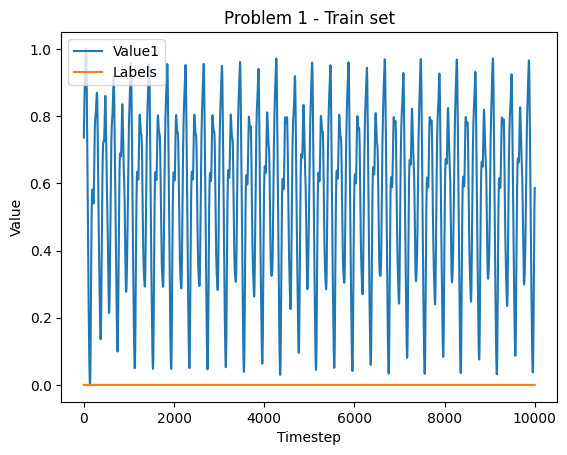

In [5]:
# train_files[0][8000:].plot()
train_files[0].plot()
plt.title("Problem 1 - Train set")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.show()

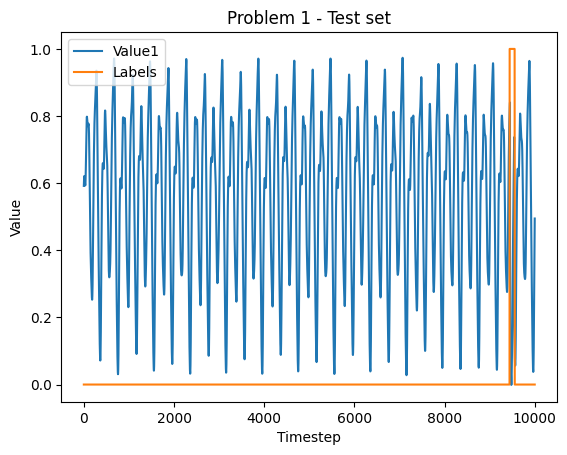

In [6]:
# test_files[0][7000:].plot()
test_files[0].plot()
plt.title("Problem 1 - Test set")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.show()

In [23]:
test_files[5].query("Labels == 1").head(5) # Example of an anomaly in the test set

,Value1,Labels
8664,0.717484,1.0
8665,0.721209,1.0
8666,0.723343,1.0
8667,0.723814,1.0
8668,0.722573,1.0


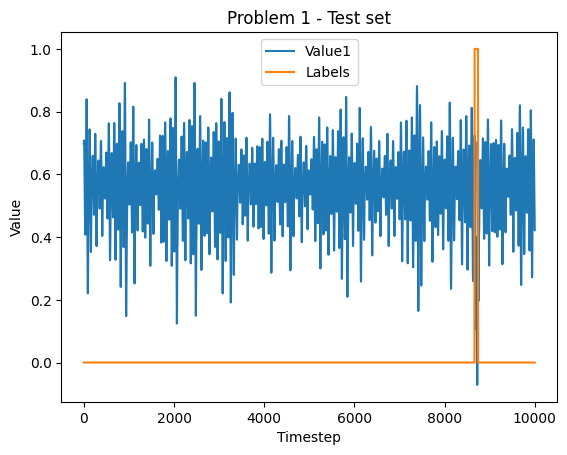

In [7]:
test_files[5].plot()
plt.title("Problem 1 - Test set")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.show()